In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# reference from theblackmamba31


In [4]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<BarContainer object of 12 artists>

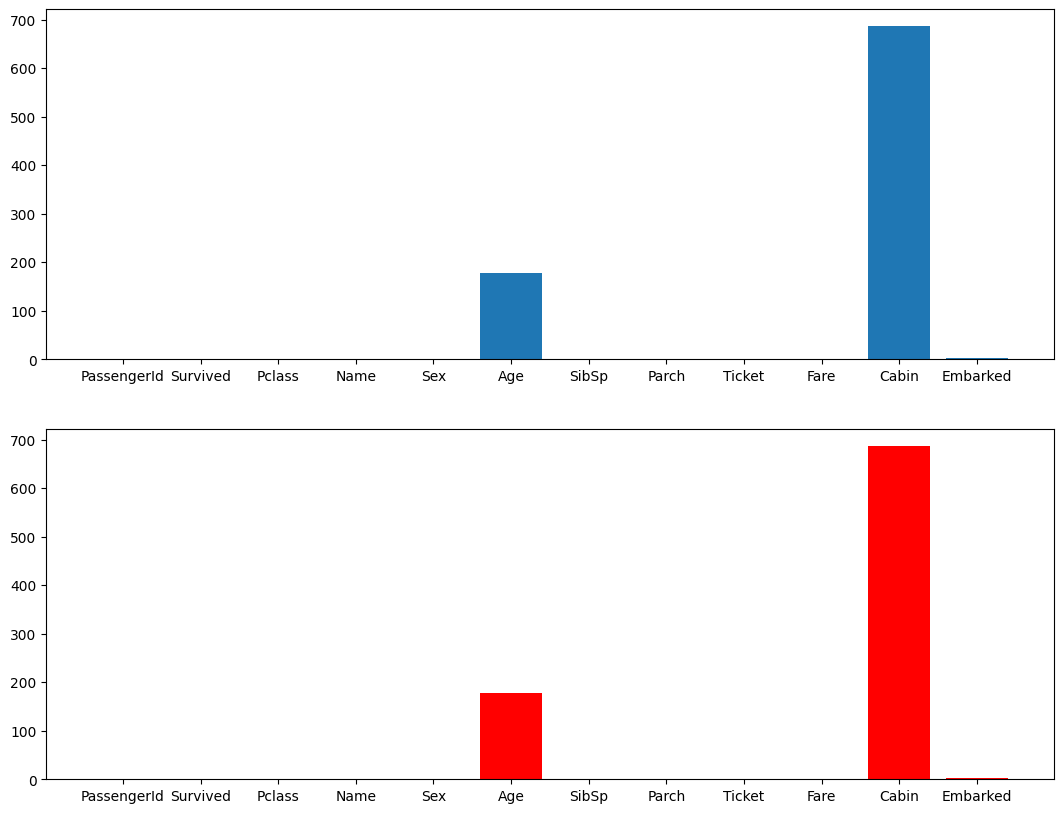

In [6]:
plt.figure(figsize=(13,10))
plt.subplot(2,1,1)
plt.bar(train_df.columns,train_df.isna().sum())
plt.subplot(2,1,2)
plt.bar(train_df.columns,train_df.isnull().sum(), color='red')

In [7]:
# it has the same null or nan values train_df
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

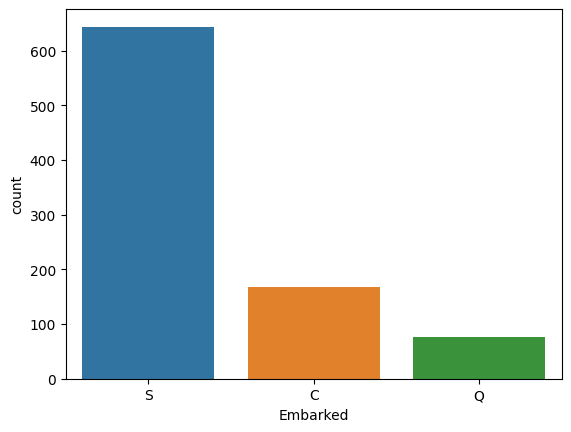

In [8]:
sns.countplot(x='Embarked', data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

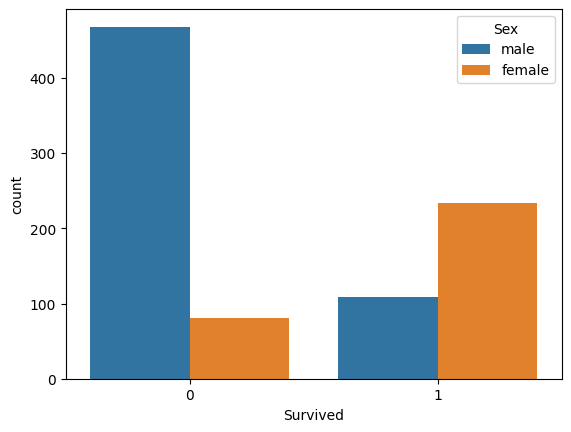

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

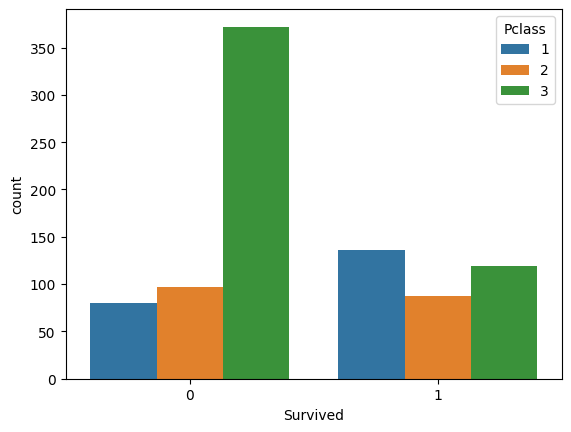

In [10]:
sns.countplot(x='Survived', data=train_df, hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

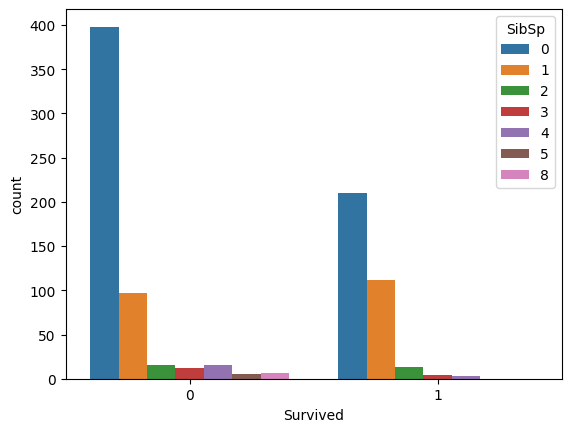

In [11]:
sns.countplot(x='Survived', data=train_df,hue='SibSp')

<Axes: xlabel='Survived', ylabel='count'>

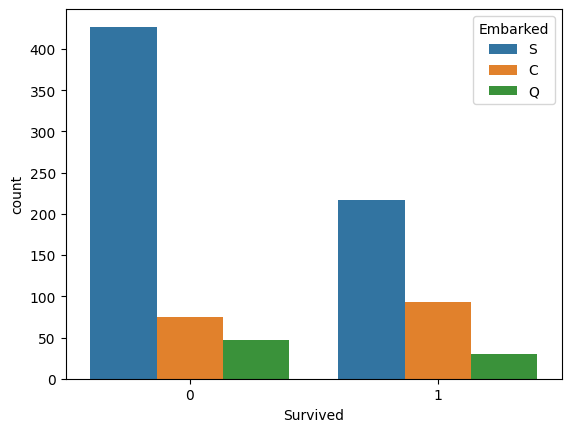

In [12]:
sns.countplot(x='Survived', data=train_df,hue='Embarked')

<Axes: xlabel='Fare'>

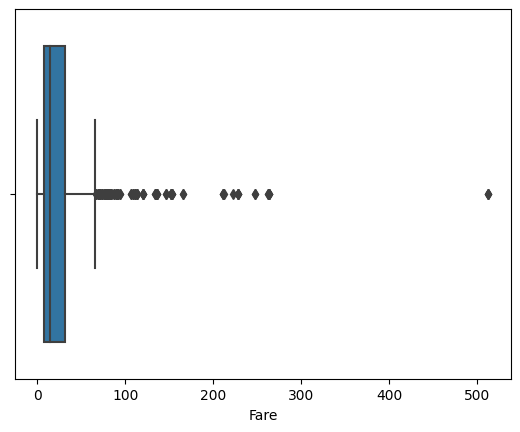

In [13]:
sns.boxplot(x='Fare', data=train_df)

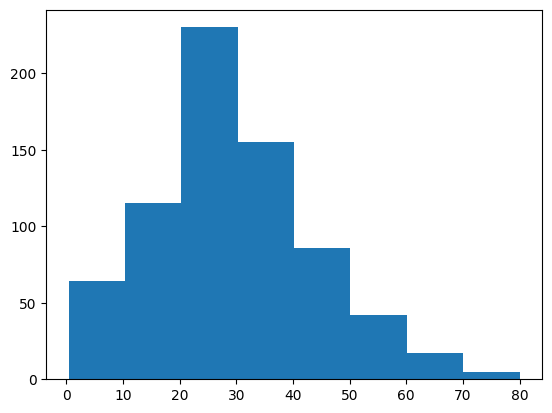

In [14]:
import numpy as np

interval = 10
value_for_bin = np.ceil((train_df.Age.max() - train_df.Age.min()) / interval).astype(int)
# bin is represent of the number of bars in histogram
plt.hist(train_df.Age, bins = value_for_bin)
plt.show()

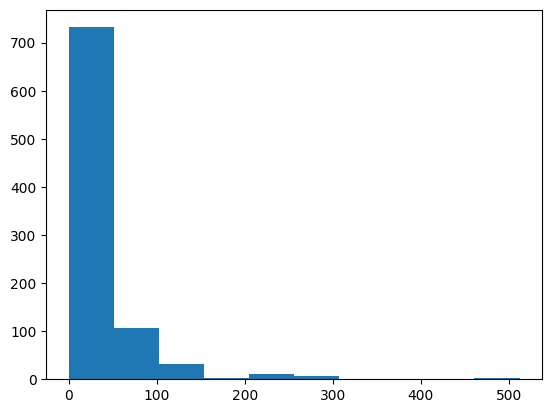

In [15]:
plt.hist(train_df.Fare, bins=10)
plt.show()

c:\Users\prevacc\Downloads\Compressed\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


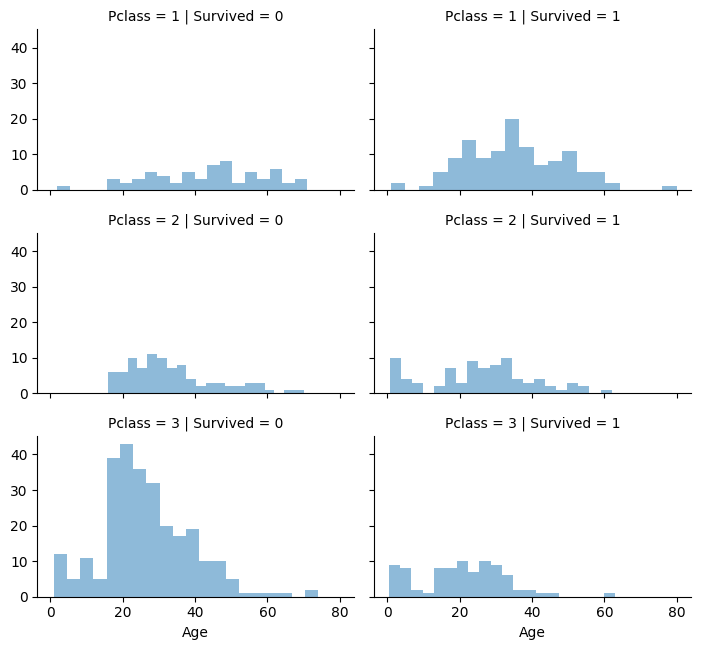

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

# grafik ini memperlihatkan bahwa:
# x adalah umur yang dimana setiap umur dengan klasifikasi sesuai pclass dan survived

c:\Users\prevacc\Downloads\Compressed\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\prevacc\Downloads\Compressed\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


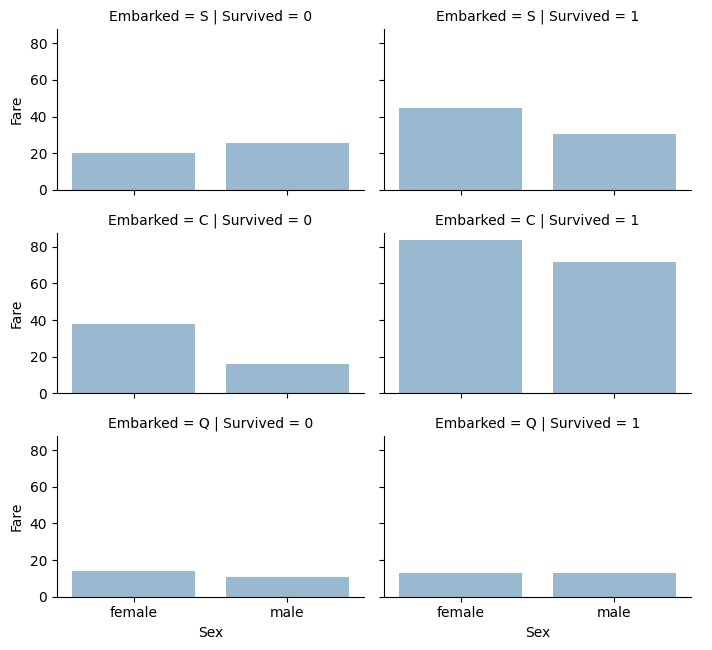

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.barplot,'Sex','Fare', alpha=.5, errorbar=None)
grid.add_legend();
plt.show()


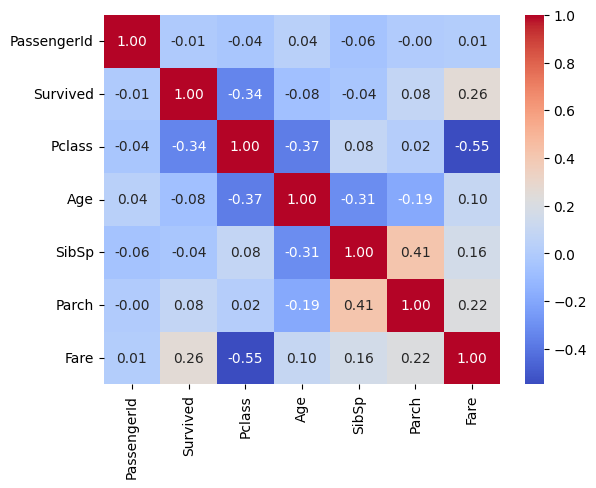

In [18]:
corr_train = train_df.select_dtypes(include=['number']).corr()

sns.heatmap(corr_train, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [19]:
(train_df.groupby(['Sex', 'Survived']).Survived.count() *100 ) / train_df.groupby(['Sex']).Survived.count()

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [20]:
(train_df.groupby(['Pclass', 'Survived']).Survived.count() *100 ) / train_df.groupby(['Pclass']).Survived.count()


Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [21]:
(train_df.groupby(['Embarked', 'Survived']).Survived.count() *100 ) / train_df.groupby(['Embarked']).Survived.count()


Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [22]:
train_df.select_dtypes(include=['number']).groupby(['Survived']).mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [23]:
comb_data = [train_df, test_df]
for dataset in comb_data:
    col = 'Sex'
    def norm_data(idx):
        return dataset[col].unique().tolist().index(idx)
    
    dataset.drop(['Ticket', 'Cabin','PassengerId','Name'], axis=1, inplace=True, errors='ignore')
    dataset.Age.fillna(dataset.Age.median(), inplace=True)
    dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace=True)
    dataset.Fare.fillna(dataset.Fare.median(), inplace=True)
    dataset[col] = dataset[col].apply(norm_data)
    col = 'Embarked'
    dataset[col] = dataset[col].apply(norm_data)
    print(dataset.isna().sum(),end=f"\n {20*'='} \n")

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [24]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [25]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,1.133971
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.580452
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


<Axes: >

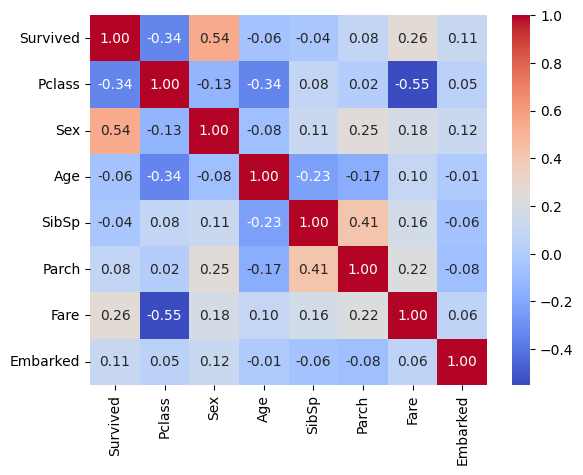

In [26]:
sns.heatmap(train_df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [27]:
from sklearn.model_selection import train_test_split
# survived_dt =pd.read_csv("gender_submission.csv")
# test_data = pd.concat([test_df, survived_dt]).drop("PassengerId", axis=1)
# train_data = pd.concat([train_df, test_df])
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.copy()
# X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape, X_test.shape)

((891, 7), (891,), (418, 7))

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input, Dropout
model = Sequential()

model.add(Input(shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal',use_bias=False))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu',kernel_initializer='he_normal',use_bias=False))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_initializer='he_normal',use_bias=False))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu',kernel_initializer='he_normal',use_bias=False))
model.add(Dense(1,activation='sigmoid'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2048      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 128)               8192      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8192      
                                                        

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
28/28 - 6s - loss: 0.6275 - accuracy: 0.6554 - 6s/epoch - 201ms/step
Epoch 2/100
28/28 - 0s - loss: 0.5808 - accuracy: 0.6869 - 161ms/epoch - 6ms/step
Epoch 3/100
28/28 - 0s - loss: 0.5509 - accuracy: 0.7205 - 176ms/epoch - 6ms/step
Epoch 4/100
28/28 - 0s - loss: 0.5525 - accuracy: 0.7149 - 184ms/epoch - 7ms/step
Epoch 5/100
28/28 - 0s - loss: 0.5450 - accuracy: 0.7217 - 168ms/epoch - 6ms/step
Epoch 6/100
28/28 - 0s - loss: 0.5372 - accuracy: 0.7452 - 177ms/epoch - 6ms/step
Epoch 7/100
28/28 - 0s - loss: 0.5349 - accuracy: 0.7363 - 161ms/epoch - 6ms/step
Epoch 8/100
28/28 - 0s - loss: 0.5199 - accuracy: 0.7598 - 154ms/epoch - 5ms/step
Epoch 9/100
28/28 - 0s - loss: 0.5235 - accuracy: 0.7598 - 153ms/epoch - 5ms/step
Epoch 10/100
28/28 - 0s - loss: 0.4890 - accuracy: 0.7834 - 153ms/epoch - 5ms/step
Epoch 11/100
28/28 - 0s - loss: 0.5054 - accuracy: 0.7778 - 154ms/epoch - 6ms/step
Epoch 12/100
28/28 - 0s - loss: 0.4973 - accuracy: 0.7666 - 150ms/epoch - 5ms/step
Epoch 13/100
2

In [31]:
predict = model.predict(X_test)
predict = (predict>0.5).astype(int).ravel()
predict

14/14 [==============================] - 0s 3ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_train, Y_pred_rand)*100,2))

28/28 [==============================] - 0s 4ms/step
Precision :  93.16
Accuracy :  84.29
Recall :  63.74
F1 score :  75.69
AUC :  80.41
